<a href="https://colab.research.google.com/github/PhalosaFanuel/Gamepro_4503-A11.2019.11717/blob/main/Prediksi_Kualitas_Udara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://githubtocolab.com/PhalosaFanuel/Tugas-Akhir/blob/main/File/Berkas-TA-2/Code/TA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

In [5]:
# Fanuel Phalosa Handiono
# A11.2019.11717
# Created in :
# 29/01/2023 19:02

# Tugas Akhir 1
# Prediksi Kualitas Udara Menggunakan CNN dan Image Transmission

In [6]:
# Connect To Drive
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Dataset/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Menelaah Data

In [9]:
df = pd.read_csv('/content/drive/My Drive/Dataset/Beijing.csv', delimiter=',', header=0)
df

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
0,1,2010,1,1,0,4,NaN,NaN,NaN,NaN,-21.0,43.0,1021.0,-11.0,NW,1.79,0.0,0.0
1,2,2010,1,1,1,4,NaN,NaN,NaN,NaN,-21.0,47.0,1020.0,-12.0,NW,4.92,0.0,0.0
2,3,2010,1,1,2,4,NaN,NaN,NaN,NaN,-21.0,43.0,1019.0,-11.0,NW,6.71,0.0,0.0
3,4,2010,1,1,3,4,NaN,NaN,NaN,NaN,-21.0,55.0,1019.0,-14.0,NW,9.84,0.0,0.0
4,5,2010,1,1,4,4,NaN,NaN,NaN,NaN,-20.0,51.0,1018.0,-12.0,NW,12.97,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,52580,2015,12,31,19,4,140.0,157.0,122.0,133.0,-8.0,68.0,1031.0,-3.0,SE,7.14,0.0,0.0
52580,52581,2015,12,31,20,4,157.0,199.0,149.0,169.0,-8.0,63.0,1030.0,-2.0,SE,8.03,0.0,0.0
52581,52582,2015,12,31,21,4,171.0,231.0,196.0,203.0,-10.0,73.0,1030.0,-6.0,NE,0.89,0.0,0.0
52582,52583,2015,12,31,22,4,204.0,242.0,221.0,212.0,-10.0,73.0,1030.0,-6.0,NE,1.78,0.0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52584 entries, 0 to 52583
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               52584 non-null  int64  
 1   year             52584 non-null  int64  
 2   month            52584 non-null  int64  
 3   day              52584 non-null  int64  
 4   hour             52584 non-null  int64  
 5   season           52584 non-null  int64  
 6   PM_Dongsi        25052 non-null  float64
 7   PM_Dongsihuan    20508 non-null  float64
 8   PM_Nongzhanguan  24931 non-null  float64
 9   PM_US Post       50387 non-null  float64
 10  DEWP             52579 non-null  float64
 11  HUMI             52245 non-null  float64
 12  PRES             52245 non-null  float64
 13  TEMP             52579 non-null  float64
 14  cbwd             52579 non-null  object 
 15  Iws              52579 non-null  float64
 16  precipitation    52100 non-null  float64
 17  Iprec       

In [13]:
df.describe()

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation,Iprec
count,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,52584.000000,25052.000000,20508.000000,24931.000000,50387.000000,52579.000000,52245.000000,52245.000000,52579.000000,52579.000000,52100.000000,52100.000000
mean,26292.500000,2012.499772,6.523962,15.726609,11.500000,2.491100,89.154439,92.560806,88.643737,95.904241,2.074554,54.602421,1016.465442,12.587040,23.261829,19.258683,19.519008
std,15179.837614,1.707485,3.448452,8.798896,6.922252,1.116988,87.239267,88.027434,88.041166,91.643772,14.222059,25.991338,10.295070,12.098527,49.281706,4381.035532,4381.036040
min,1.000000,2010.000000,1.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,1.000000,-40.000000,2.000000,991.000000,-19.000000,0.450000,0.000000,0.000000
25%,13146.750000,2011.000000,4.000000,8.000000,5.750000,1.000000,24.000000,28.000000,24.000000,27.000000,-10.000000,31.000000,1008.000000,2.000000,1.790000,0.000000,0.000000
50%,26292.500000,2012.000000,7.000000,16.000000,11.500000,2.000000,64.000000,68.000000,62.000000,69.000000,2.000000,55.000000,1016.000000,14.000000,4.920000,0.000000,0.000000
75%,39438.250000,2014.000000,10.000000,23.000000,17.250000,3.000000,124.000000,127.000000,122.000000,132.000000,15.000000,78.000000,1025.000000,23.000000,21.020000,0.000000,0.000000
max,52584.000000,2015.000000,12.000000,31.000000,23.000000,4.000000,737.000000,672.000000,844.000000,994.000000,28.000000,100.000000,1046.000000,42.000000,585.600000,999990.000000,999990.000000


In [14]:
# Melihat ukuran datset
print(df.shape)

(52584, 18)


# Data Preprocessing
Mengambil data tahun 2014

In [16]:
# Mengambil index pertama dan terakhir tahun 2014
start_index = 0
end_index = 0
for i in range (0, 52585):
  if df['year'][i] == 2014 and start_index == 0:
    start_index = i
  elif df['year'][i] == 2015:
    end_index = i-1
    break

In [17]:
# Start Index
start_index

35064

In [18]:
# End Index
end_index

43823

In [19]:
# Mengambil Data 2014
df_2014 = df[35064:43824]
df_2014

,No,year,month,day,hour,season,PM_Dongsi,PM_Dongsihuan,PM_Nongzhanguan,PM_US Post,DEWP,HUMI,PRES,TEMP,cbwd,Iws,precipitation,Iprec
35064,35065,2014,1,1,0,4,66.0,46.0,58.0,53.0,-20.0,12.0,1014.0,7.0,NW,143.48,0.0,0.0
35065,35066,2014,1,1,1,4,70.0,49.0,68.0,65.0,-20.0,12.0,1013.0,7.0,NW,147.50,0.0,0.0
35066,35067,2014,1,1,2,4,71.0,57.0,83.0,70.0,-20.0,13.0,1013.0,6.0,NW,151.52,0.0,0.0
35067,35068,2014,1,1,3,4,82.0,86.0,75.0,79.0,-20.0,13.0,1013.0,6.0,NW,153.31,0.0,0.0
35068,35069,2014,1,1,4,4,93.0,95.0,83.0,92.0,-18.0,19.0,1012.0,3.0,cv,0.89,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,4,3.0,8.0,8.0,10.0,-23.0,18.0,1034.0,-2.0,NW,231.97,0.0,0.0
43820,43821,2014,12,31,20,4,3.0,7.0,8.0,10.0,-22.0,21.0,1034.0,-3.0,NW,237.78,0.0,0.0
43821,43822,2014,12,31,21,4,3.0,8.0,7.0,8.0,-22.0,21.0,1034.0,-3.0,NW,242.70,0.0,0.0
43822,43823,2014,12,31,22,4,3.0,10.0,8.0,12.0,-22.0,23.0,1034.0,-4.0,NW,246.72,0.0,0.0


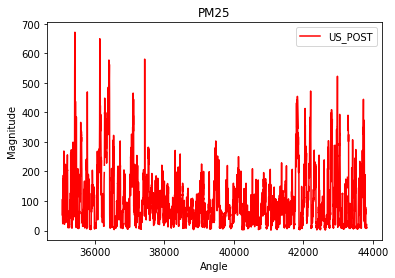

In [24]:
# Plotting both the curves simultaneously
plt.plot(df_2014["PM_US Post"], color='r', label='US_POST')
# plt.plot(df_2014[""], color='g', label='cos')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Angle")
plt.ylabel("Magnitude")
plt.title("PM25")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [20]:
# Mengecek missing value 
df_2014.isnull().values.any()

True

In [21]:
# Melihat lokasi pada kolom dataframe yang kosong atau NaN
df_2014.loc[:, df.isnull().any()].columns

Index(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'PM_US Post', 'DEWP',
       'HUMI', 'PRES', 'TEMP', 'cbwd', 'Iws', 'precipitation', 'Iprec'],
      dtype='object')